<a href="https://colab.research.google.com/github/madhulikag/BanaNET/blob/main/Bananutrient_multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, MobileNetV3Large
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Conv2D, DepthwiseConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from PIL import Image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Image directory, change to yours as needed
data_dir = '/content/drive/MyDrive/Banana_leaf'

image_size = (224, 224)
batch_size = 32


In [4]:
# Data Processing for unorganized directory
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = False
)

Found 2657 images belonging to 4 classes.
Found 664 images belonging to 4 classes.


In [5]:
# Data Processing for organized directory
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Banana_leaf_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Banana_leaf_split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False
)

Found 2657 images belonging to 4 classes.
Found 664 images belonging to 4 classes.


In [6]:
# input shape: image size and RGB
base_model = MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model weights for now
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))
x = base_model(inputs, training=False)  # pass inputs through base model
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,        # Reduce LR by 50%
    patience=2,        # Wait 2 epochs before reducing
    min_lr=1e-6,       # Don't go below this LR
    verbose=1
)



In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[reduce_lr, early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3225 - loss: 1.5604

84/84 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.3233 - loss: 1.5579 - val_accuracy: 0.5979 - val_loss: 0.9750 - learning_rate: 1.0000e-04
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5617 - loss: 1.0202

84/84 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5620 - loss: 1.0196 - val_accuracy: 0.6687 - val_loss: 0.8320 - learning_rate: 1.0000e-04
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6500 - loss: 0.8384

84/84 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.6499 - loss: 0.8384 - val_accuracy: 0.7018 - val_loss: 0.7567 - learning_rate: 1.0000e-04
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6842 - loss: 0.7730

84/84 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6842 - loss: 0.7729 - val_accuracy: 0.7184 - val_loss: 0.7045 - learning_rate: 1.0000e-04
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7068 - loss: 0.7170

84/84 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7068 - loss: 0.7169 - val_accuracy: 0.7154 - val_loss: 0.6779 - learning_rate: 1.0000e-04
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7299 - loss: 0.6694

84/84 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7300 - loss: 0.6692 - val_accuracy: 0.7380 - val_loss: 0.6508 - learning_rate: 1.0000e-04
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7534 - loss: 0.6294

84/84 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7533 - loss: 0.6294 - val_accuracy: 0.7364 - val_loss: 0.6353 - learning_rate: 1.0000e-04
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7708 - loss: 0.5982

84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7707 - loss: 0.5981 - val_accuracy: 0.7410 - val_loss: 0.6230 - learning_rate: 1.0000e-04
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7736 - loss: 0.5753

84/84 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7736 - loss: 0.5753 - val_accuracy: 0.7470 - val_loss: 0.5967 - learning_rate: 1.0000e-04
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7820 - loss: 0.5438

84/84 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7820 - loss: 0.5438 - val_accuracy: 0.7530 - val_loss: 0.5875 - learning_rate: 1.0000e-04
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8042 - loss: 0.5298

84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8042 - loss: 0.5297 - val_accuracy: 0.7605 - val_loss: 0.5794 - learning_rate: 1.0000e-04
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8176 - loss: 0.4863

84/84 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8174 - loss: 0.4865 - val_accuracy: 0.7666 - val_loss: 0.5642 - learning_rate: 1.0000e-04
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8256 - loss: 0.4908

84/84 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8255 - loss: 0.4908 - val_accuracy: 0.7666 - val_loss: 0.5532 - learning_rate: 1.0000e-04
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8269 - loss: 0.4721

84/84 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8270 - loss: 0.4719 - val_accuracy: 0.7771 - val_loss: 0.5397 - learning_rate: 1.0000e-04
Epoch 15/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8454 - loss: 0.4359

84/84 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8453 - loss: 0.4360 - val_accuracy: 0.7816 - val_loss: 0.5357 - learning_rate: 1.0000e-04
Epoch 16/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8319 - loss: 0.4189

84/84 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8319 - loss: 0.4190 - val_accuracy: 0.7877 - val_loss: 0.5268 - learning_rate: 1.0000e-04
Epoch 17/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8498 - loss: 0.4179

84/84 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8498 - loss: 0.4179 - val_accuracy: 0.7937 - val_loss: 0.5177 - learning_rate: 1.0000e-04
Epoch 18/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8468 - loss: 0.4036

84/84 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8468 - loss: 0.4037 - val_accuracy: 0.7982 - val_loss: 0.5156 - learning_rate: 1.0000e-04
Epoch 19/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8616 - loss: 0.3931

84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8615 - loss: 0.3931 - val_accuracy: 0.8012 - val_loss: 0.5098 - learning_rate: 1.0000e-04
Epoch 20/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8617 - loss: 0.3789

84/84 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8616 - loss: 0.3790 - val_accuracy: 0.7982 - val_loss: 0.5035 - learning_rate: 1.0000e-04
Epoch 21/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8751 - loss: 0.3597

84/84 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8751 - loss: 0.3598 - val_accuracy: 0.7967 - val_loss: 0.4994 - learning_rate: 1.0000e-04
Epoch 22/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8794 - loss: 0.3495

84/84 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8793 - loss: 0.3496 - val_accuracy: 0.8012 - val_loss: 0.4947 - learning_rate: 1.0000e-04
Epoch 23/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8845 - loss: 0.3507

84/84 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.8844 - loss: 0.3507 - val_accuracy: 0.7982 - val_loss: 0.4875 - learning_rate: 1.0000e-04
Epoch 24/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8753 - loss: 0.3414

84/84 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8754 - loss: 0.3413 - val_accuracy: 0.8117 - val_loss: 0.4796 - learning_rate: 1.0000e-04
Epoch 25/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8766 - loss: 0.3393 - val_accuracy: 0.8117 - val_loss: 0.4809 - learning_rate: 1.0000e-04
Epoch 26/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8899 - loss: 0.3157

84/84 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8900 - loss: 0.3157 - val_accuracy: 0.8178 - val_loss: 0.4733 - learning_rate: 1.0000e-04
Epoch 27/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9050 - loss: 0.2987

84/84 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9049 - loss: 0.2988 - val_accuracy: 0.8178 - val_loss: 0.4706 - learning_rate: 1.0000e-04
Epoch 28/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9060 - loss: 0.2907

84/84 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9059 - loss: 0.2908 - val_accuracy: 0.8193 - val_loss: 0.4650 - learning_rate: 1.0000e-04
Epoch 29/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9174 - loss: 0.2679

84/84 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9173 - loss: 0.2681 - val_accuracy: 0.8223 - val_loss: 0.4640 - learning_rate: 1.0000e-04
Epoch 30/30
 6/84 ━━━━━━━━━━━━━━━━━━━━ 1:20 1s/step - accuracy: 0.8903 - loss: 0.2815

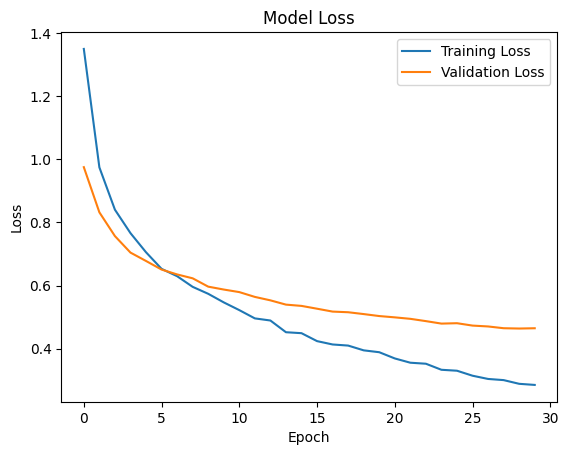

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Predict probabilities
y_pred_probs = model.predict(val_generator)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels from the generator
y_true = val_generator.classes

21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


In [15]:
from sklearn.metrics import classification_report
# Generate classification report with class names
class_labels = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

     healthy       0.84      0.80      0.82       190
   magnesium       0.85      0.88      0.86       160
   potassium       0.86      0.89      0.87       168
     sulphur       0.72      0.72      0.72       146

    accuracy                           0.82       664
   macro avg       0.82      0.82      0.82       664
weighted avg       0.82      0.82      0.82       664



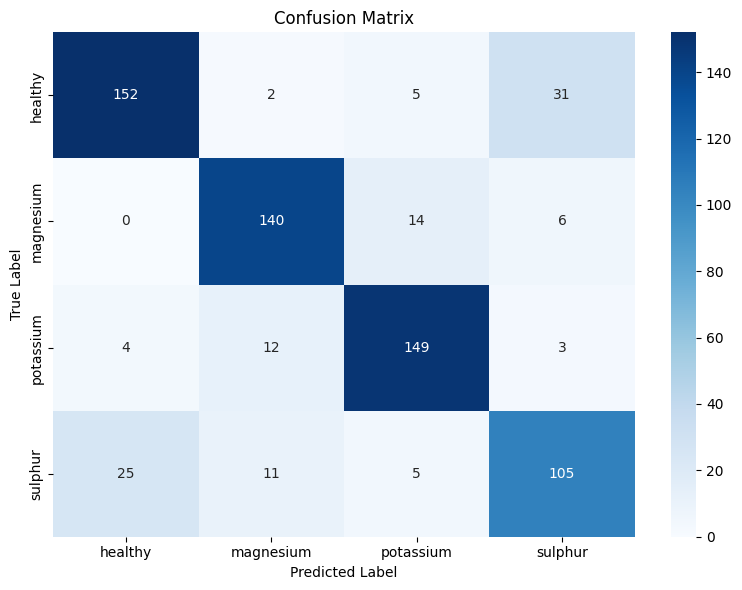

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# Generate Confusion matrix with class names
class_labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()